<a href="https://colab.research.google.com/github/SinKasula/psm/blob/master/test_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title First we need to install the packages that we need to run PSM { display-mode: "both" }
!pip install pandas # Required Package
!pip install pymatch  # Actual Package

  Created wheel for pymatch: filename=pymatch-0.3.4-cp36-none-any.whl size=9115 sha256=e4f4dd036777162805963a148f62b2b4812970be44ef6985f8b12734a85ddb6b
  Stored in directory: /root/.cache/pip/wheels/95/c4/23/2d06fb55633c2fc4b416d12f1881486a876c0e0cfce8b9cd6f
Successfully built pymatch


In [0]:
#@title After Installing we call the packages
# import ppscore as pps
# import pyreadstat as prs
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd

In [0]:
#@title We add drive to this google session so we can access files { display-mode: "both" }
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#@title Change the path to file folder where input files exists (spss files folder)
# %ls ./drive/'My Drive'/testing_spss_python/

In [0]:
#@title Assign the Full path to a variable
path = r"./drive/My Drive/testing_spss_python/RetentionAnalysis_1213_to_1718_unlock.sav"

In [0]:
#@title We load the dataset into memory by saving it in variable
df = pd.read_spss(path=path, convert_categoricals=True)
df.head()

,a_a_RANDOMID,a_b_AWARD_CATEGORY_1,a_b_AWARD_DEGREE_1,a_b_AWARD_GRAD_TERM_1,a_b_AWARD_GRAD_TERM_1_DATE,a_b_DEGINT,a_b_DEGINT_Bach,a_b_ENRSTA,a_b_ENRSTA_NewFresh,a_b_ENRSTA_Trans,a_b_MATRIC_TERM,a_b_MATRIC_TERM_DATE,a_b_MATRIC_Year_SumFall,a_b_Yr1_Yr2_Retention,a_dem_dateofbirth,a_dem_gender,a_dem_gender_dichotomous,a_dem_IPED_DESC,a_dem_IPED_DESC_2orMore,a_dem_IPED_DESC_AmInd,a_dem_IPED_DESC_Asian,a_dem_IPED_DESC_Black,a_dem_IPED_DESC_Hispanic,a_dem_IPED_DESC_Internat,a_dem_IPED_DESC_PacIs,a_dem_IPED_DESC_Unknown,a_dem_IPED_DESC_WHITE,a_dem_IPED_URM,a_dem_URM_PELL_Combined_CAT,a_dem_Veteran,a_e_HS_GPA_UNWTD,a_e_HS_GPA_WTD,a_e_HS_GPA_WTD_CAT,a_e_HS_NON_UNCC_CREDITS,a_e_HS_NON_UNCC_CREDITS_CAT,a_e_HS_NON_UNCC_CREDITS_CAT_NEW,a_e_HS_Test_ACT_SAT_Std,a_e_HS_Test_ACT_SAT_Std_CAT,a_FY_a_House_Sem1_Commute,a_FY_a_House_Sem1_Resident,...,k_CAT_Help_ITS_Yr1,k_CAT_Lib_AfterHrs_Yr1,k_CAT_Lib_Books_Yr1,k_CAT_Lib_EZProxy_Yr1,k_CAT_Lib_Instruction_Yr1,k_CAT_Lib_LabLogins_Yr1,k_CAT_Lib_Laptops_Yr1,k_CAT_Lib_OtherCirc_Yr1,k_CAT_Lib_StudyRooms_Yr1,k_CAT_Lib_Yr1_GrandTotal,k_CAT_UCAE_Yr1_GrandTotal,k_CAT_USC_Yr1_GrandTotal,k_CAT_WRC_Yr1_GrandTotal,k_CAT_YR1_GPA,k_CAT_YR1_GPA_x_CreditsRatio,k_CAT_CC_CareerAdvising_Yr1,k_CAT_CC_CareerFair_Yr1,k_CAT_CC_ClassPresentation_Yr1,k_CAT_CC_SelfAssessment_Yr1,k_CAT_CC_Workshop_Yr1,k_CAT_UCAE_IC_Yr1,k_CAT_UCAE_SI_Yr1,k_CAT_UCAE_SS_Yr1,k_CAT_UCAE_TS_Yr1,k_CAT_UCAE_WS_Yr1,k_CAT_USC_Classroom_Yr1,k_CAT_USC_IndCons_Yr1,k_CAT_USC_Workshop_Yr1,k_CAT_WRC_ClassPres_Yr1,k_CAT_WRC_IC_Yr1,ag_EE_Credit_1Yr_Dichot,ag_EE_Credit_1Yr_Type_CAT,ag_EE_UPIP_Yr1_Dichot,ag_EE_Y1_Total,co_OUR_Total_1819,a_e_HIP_Total_Yr1,a_c_FDS_16,a_c_FDS_17,a_c_FDS_18,a_c_FDS_19
0,117918.0,24,BA,201670,NaN,3,1.0,2.0,0.0,1.0,201480,1.362623e+10,1415.0,1.0,1.294453e+10,MALE,0.0,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,NaN,NaN,NaN,64.0,6.0,6.0,NaN,NaN,1.0,0.0,...,NaN,NaN,3.0,NaN,2.0,2.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,999.0,1.0,999.0,999.0
1,149070.0,24,BSME,201580,NaN,3,1.0,2.0,0.0,1.0,201280,1.356316e+10,1213.0,1.0,1.288976e+10,MALE,0.0,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,52.0,5.0,5.0,28.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,1.0,1.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,6.0,0.0,0.0,0.0,1.0,3.0,999.0,3.0,999.0
2,176297.0,.,.,.,NaN,3,1.0,2.0,0.0,1.0,201580,1.365777e+10,1516.0,1.0,1.296674e+10,FEMALE,1.0,ASIAN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,43.0,5.0,5.0,NaN,NaN,0.0,1.0,...,1.0,1.0,2.0,NaN,1.0,3.0,3.0,3.0,3.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,2.0,999.0,999.0,999.0,999.0
3,248574.0,.,.,.,NaN,3,1.0,2.0,0.0,1.0,201380,1.359469e+10,1314.0,0.0,1.292432e+10,MALE,0.0,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,NaN,NaN,NaN,73.0,6.0,6.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,999.0,999.0,999.0,999.0
4,279371.0,.,.,.,NaN,3,1.0,2.0,0.0,1.0,201280,1.356316e+10,1213.0,1.0,1.291265e+10,FEMALE,1.0,RACE/ETHNICITY UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,38.0,4.0,5.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,3.0,3.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,999.0,999.0,999.0,999.0


In [0]:
#@title To see the basic descriptive stats
df.describe()

,a_a_RANDOMID,a_b_AWARD_GRAD_TERM_1_DATE,a_b_DEGINT_Bach,a_b_ENRSTA,a_b_ENRSTA_NewFresh,a_b_ENRSTA_Trans,a_b_MATRIC_TERM_DATE,a_b_MATRIC_Year_SumFall,a_b_Yr1_Yr2_Retention,a_dem_dateofbirth,a_dem_gender_dichotomous,a_dem_IPED_DESC_2orMore,a_dem_IPED_DESC_AmInd,a_dem_IPED_DESC_Asian,a_dem_IPED_DESC_Black,a_dem_IPED_DESC_Hispanic,a_dem_IPED_DESC_Internat,a_dem_IPED_DESC_PacIs,a_dem_IPED_DESC_Unknown,a_dem_IPED_DESC_WHITE,a_dem_IPED_URM,a_dem_URM_PELL_Combined_CAT,a_dem_Veteran,a_e_HS_GPA_UNWTD,a_e_HS_GPA_WTD,a_e_HS_GPA_WTD_CAT,a_e_HS_NON_UNCC_CREDITS,a_e_HS_NON_UNCC_CREDITS_CAT,a_e_HS_NON_UNCC_CREDITS_CAT_NEW,a_e_HS_Test_ACT_SAT_Std,a_e_HS_Test_ACT_SAT_Std_CAT,a_FY_a_House_Sem1_Commute,a_FY_a_House_Sem1_Resident,a_FY_LearningCo_Partic,a_FY_LECTSEM_LESS_25_New,a_FY_LECTSEM_LESS_25_Partic,a_FY_UWRT_1102_03_or_04_CAT,a_FY_UWRT_APIB,a_FY_UWRT_None,a_FY_UWRT_Transfer,...,k_CAT_Help_ITS_Yr1,k_CAT_Lib_AfterHrs_Yr1,k_CAT_Lib_Books_Yr1,k_CAT_Lib_EZProxy_Yr1,k_CAT_Lib_Instruction_Yr1,k_CAT_Lib_LabLogins_Yr1,k_CAT_Lib_Laptops_Yr1,k_CAT_Lib_OtherCirc_Yr1,k_CAT_Lib_StudyRooms_Yr1,k_CAT_Lib_Yr1_GrandTotal,k_CAT_UCAE_Yr1_GrandTotal,k_CAT_USC_Yr1_GrandTotal,k_CAT_WRC_Yr1_GrandTotal,k_CAT_YR1_GPA,k_CAT_YR1_GPA_x_CreditsRatio,k_CAT_CC_CareerAdvising_Yr1,k_CAT_CC_CareerFair_Yr1,k_CAT_CC_ClassPresentation_Yr1,k_CAT_CC_SelfAssessment_Yr1,k_CAT_CC_Workshop_Yr1,k_CAT_UCAE_IC_Yr1,k_CAT_UCAE_SI_Yr1,k_CAT_UCAE_SS_Yr1,k_CAT_UCAE_TS_Yr1,k_CAT_UCAE_WS_Yr1,k_CAT_USC_Classroom_Yr1,k_CAT_USC_IndCons_Yr1,k_CAT_USC_Workshop_Yr1,k_CAT_WRC_ClassPres_Yr1,k_CAT_WRC_IC_Yr1,ag_EE_Credit_1Yr_Dichot,ag_EE_Credit_1Yr_Type_CAT,ag_EE_UPIP_Yr1_Dichot,ag_EE_Y1_Total,co_OUR_Total_1819,a_e_HIP_Total_Yr1,a_c_FDS_16,a_c_FDS_17,a_c_FDS_18,a_c_FDS_19
count,3.702200e+04,0.0,37022.0,37022.000000,37022.000000,37022.000000,3.702200e+04,37022.000000,37022.000000,3.702200e+04,37022.000000,37022.00000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,31585.000000,21296.000000,24060.000000,24058.000000,37022.000000,37022.000000,37022.000000,27272.000000,27272.000000,36993.000000,36993.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,...,19081.000000,19081.000000,25198.00000,6313.000000,37022.000000,37022.000000,25198.000000,30926.000000,37022.000000,37022.000000,37022.000000,37022.000000,25198.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,12792.000000,12792.000000,12792.000000,25198.000000,25198.000000,37022.000000,13028.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000,37022.000000
mean,5.000882e+08,NaN,1.0,1.454162,0.545838,0.454162,1.364352e+10,1470.287829,0.793960,1.298417e+10,0.480093,0.04419,0.004052,0.056021,0.160310,0.087921,0.019718,0.001297,0.022014,0.604478,0.339501,2.925639,0.026690,3.274273,3.790854,5.021157,28.176039,3.325401,3.456161,22.653271,2.994793,0.496689,0.503311,0.113365,1.103371,0.701745,1.949922,0.004646,0.088542,0.374102,...,1.099523,1.139248,1.30050,1.916205,1.518178,1.765275,1.129653,1.162291,1.281751,2.631895,1.707876,1.001161,1.168347,3.403814,2.999460,1.154233,1.167873,1.197342,1.017962,1.034601,1.017044,1.317838,1.044325,1.279509,1.467533,1.001642,1.002033,1.000469,1.129217,1.079252,0.017314,5.883175,0.000216,0.017530,0.008481,1.663659,984.919318,944.900492,920.627276,897.494652
std,2.879766e+08,NaN,0.0,0.497901,0.497901,0.497901,5.390762e+07,172.540163,0.404465,1.725914e+08,0.499610,0.20552,0.063524,0.229965,0.366898,0.283183,0.139031,0.035984,0.146731,0.488969,0.473546,1.158099,0.161178,0.410859,0.534273,0.980337,28.717909,1.929674,2.003430,3.945716,0.711495,0.499996,0.499996,0.317043,0.943122,0.457498,1.465274,0.068003,0.284085,0.483897,...,0.311721,0.421576,0.62861,0.761755,0.689443,0.798120,0.412211,0.485804,0.645678,1.329198,0.845316,0.034061,0.414920,1.331102,1.

In [0]:
#@title make a list of all predictor variables. based on whom we would like to compute the propensity score and dependent variable
cols = [ 'a_a_RANDOMID','a_dem_IPED_URM', 'a_e_HS_NON_UNCC_CREDITS_CAT', 'a_e_HS_GPA_WTD_CAT', 'a_b_Yr1_Yr2_Retention', 'a_b_ENRSTA_NewFresh', 'a_e_HS_Test_ACT_SAT_Std_CAT', 'a_h_Pell_Elig_Yr1' ]

In [0]:
#@title Creating a new variable with limited columns 
df_new = df[cols]
df_new.head()

,a_a_RANDOMID,a_dem_IPED_URM,a_e_HS_NON_UNCC_CREDITS_CAT,a_e_HS_GPA_WTD_CAT,a_b_Yr1_Yr2_Retention,a_b_ENRSTA_NewFresh,a_e_HS_Test_ACT_SAT_Std_CAT,a_h_Pell_Elig_Yr1
0,117918.0,0.0,6.0,NaN,1.0,0.0,NaN,1.0
1,149070.0,0.0,5.0,NaN,1.0,0.0,4.0,0.0
2,176297.0,0.0,5.0,NaN,1.0,0.0,NaN,1.0
3,248574.0,0.0,6.0,NaN,0.0,0.0,NaN,0.0
4,279371.0,1.0,4.0,NaN,1.0,0.0,NaN,0.0


In [0]:
#@title We need the categorical variables as objects. if they are loaded as scaled variables. change them back
for x in df_new.columns:
  df_new[x] = df_new[x].astype(str)

In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37022 entries, 0 to 37021
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   a_a_RANDOMID                 37022 non-null  object
 1   a_dem_IPED_URM               37022 non-null  object
 2   a_e_HS_NON_UNCC_CREDITS_CAT  37022 non-null  object
 3   a_e_HS_GPA_WTD_CAT           37022 non-null  object
 4   a_b_Yr1_Yr2_Retention        37022 non-null  object
 5   a_b_ENRSTA_NewFresh          37022 non-null  object
 6   a_e_HS_Test_ACT_SAT_Std_CAT  37022 non-null  object
 7   a_h_Pell_Elig_Yr1            37022 non-null  object
dtypes: object(8)
memory usage: 2.3+ MB


In [0]:
#@title Seeing the count of classes of dependent variable
df_new.a_b_Yr1_Yr2_Retention.value_counts()

1.0    29394
0.0     7628
Name: a_b_Yr1_Yr2_Retention, dtype: int64

In [0]:
#@title Checking if there are any missing values. If they are then they must be equated to mean or remove the records
df_new.isna().sum()

a_a_RANDOMID                   0
a_dem_IPED_URM                 0
a_e_HS_NON_UNCC_CREDITS_CAT    0
a_e_HS_GPA_WTD_CAT             0
a_b_Yr1_Yr2_Retention          0
a_b_ENRSTA_NewFresh            0
a_e_HS_Test_ACT_SAT_Std_CAT    0
a_h_Pell_Elig_Yr1              0
dtype: int64

In [0]:
#@title Dividing into test and control
test = df_new[df_new.a_b_Yr1_Yr2_Retention == "0.0"]
control = df_new[df_new.a_b_Yr1_Yr2_Retention == "1.0"]
test['a_b_Yr1_Yr2_Retention'] = 0
control['a_b_Yr1_Yr2_Retention'] = 1


In [0]:
#@title we create a match object and the equation it returns is how the logistic regression is performed. like what variables are used.
m = Matcher(test, control, yvar="a_b_Yr1_Yr2_Retention", exclude=['a_a_RANDOMID', 'a_b_ENRSTA_NewFresh'])

Formula:
a_b_Yr1_Yr2_Retention ~ a_dem_IPED_URM+a_e_HS_NON_UNCC_CREDITS_CAT+a_e_HS_GPA_WTD_CAT+a_e_HS_Test_ACT_SAT_Std_CAT+a_h_Pell_Elig_Yr1
n majority: 29394
n minority: 7628


In [0]:
#@title Now we train the model with m.fit() function, we give the parameters balance =True because there is huge variation in classes 0,1 for dependent variable. And, nmodel repeats the fitting n times for better accuracy
np.random.seed(7895)
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 58.36%


In [0]:
#@title using m.predict_scores() function we create propensity scores for every case
m.predict_scores()

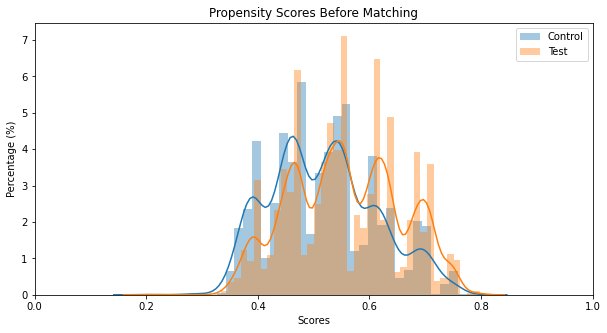

In [0]:
#@title We plot the propensity scores generated to see if the classes are separable
m.plot_scores()

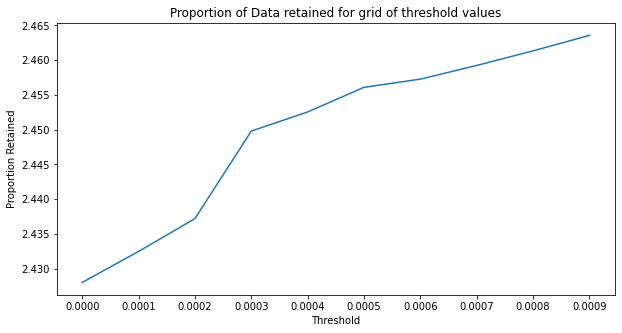

In [0]:
#@title Finding the right value for the match tolerance using m.tune_threshold() function
m.tune_threshold(method='random')

In [0]:
#@title Using the Match method we start matching based on matching threshold determined in the previous step
m.match(method="random", nmatches=1, threshold=0.01)
m.record_frequency()

,freq,n_records
0,1,19247
1,2,593
2,3,684
3,4,617
4,5,510
5,6,376
6,7,279
7,8,195
8,9,147
9,10,81


In [0]:
#@title Assigning weight to record - more the weight, more times this record is matched
m.assign_weight_vector()

In [0]:
#@title This is the resultant output dataset
m.matched_data.sort_values("match_id").head(6)

,record_id,weight,a_a_RANDOMID,a_dem_IPED_URM,a_e_HS_NON_UNCC_CREDITS_CAT,a_e_HS_GPA_WTD_CAT,a_b_Yr1_Yr2_Retention,a_b_ENRSTA_NewFresh,a_e_HS_Test_ACT_SAT_Std_CAT,a_h_Pell_Elig_Yr1,scores,match_id
7016,2852,0.333333,379010730.0,1.0,1.0,5.0,0,1.0,3.0,0.0,0.526059,5
18881,7633,1.000000,364785.0,1.0,4.0,3.0,1,0.0,2.0,1.0,0.527654,5
18882,7634,1.000000,417141.0,1.0,2.0,4.0,1,1.0,3.0,0.0,0.611678,6
3783,1519,0.142857,198608800.0,0.0,4.0,6.0,0,1.0,3.0,1.0,0.603611,6
18883,7635,1.000000,507994.0,0.0,1.0,5.0,1,1.0,4.0,0.0,0.449877,7
12400,5036,0.250000,660360133.0,0.0,1.0,4.0,0,1.0,2.0,0.0,0.447178,7


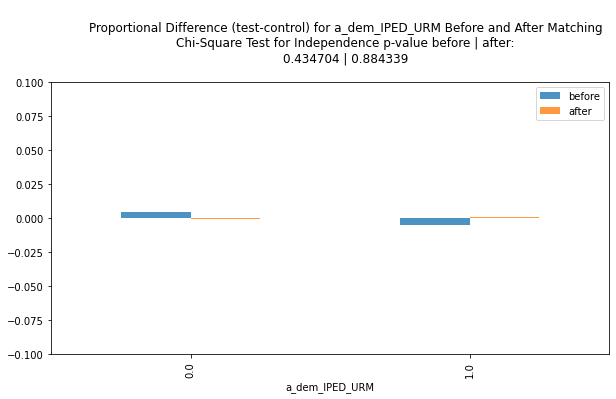

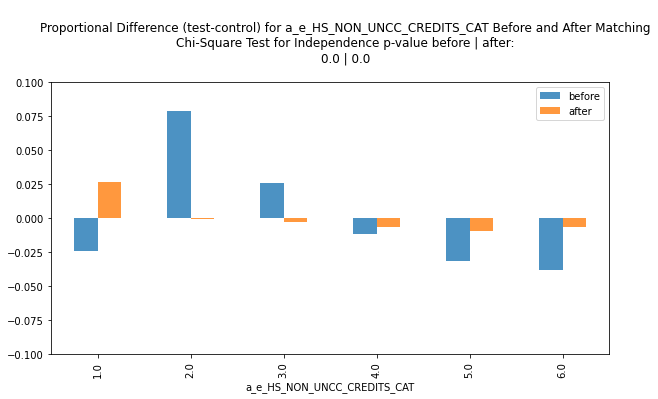

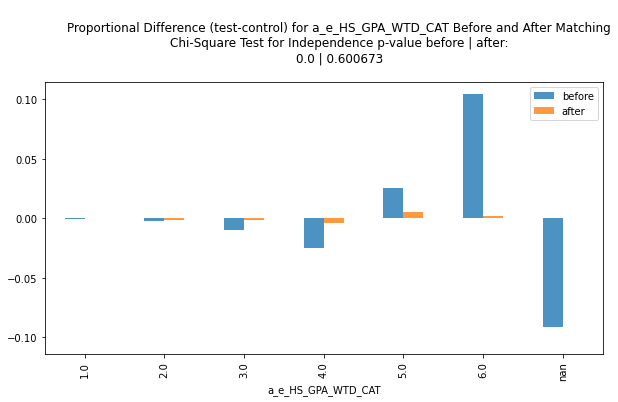

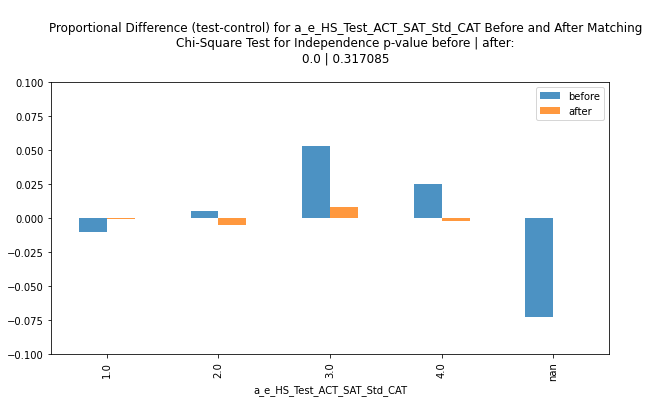

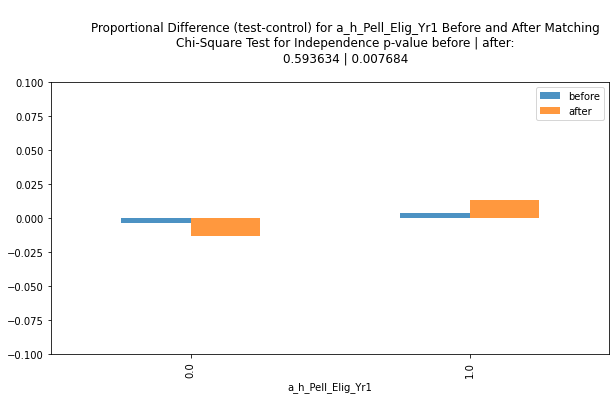

In [0]:
#@title Run Chi-Square test of independence and what we want is After matching the p-value to be > 0.05, resulting in our failure to reject the null hypothesis that the frequency of the enumerated term values are independent of our test and control groups
##Results Categorical variables Before and After Matching

categorical_results = m.compare_categorical(return_table=True)